In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
len(df['Item_Identifier'].unique())

1559

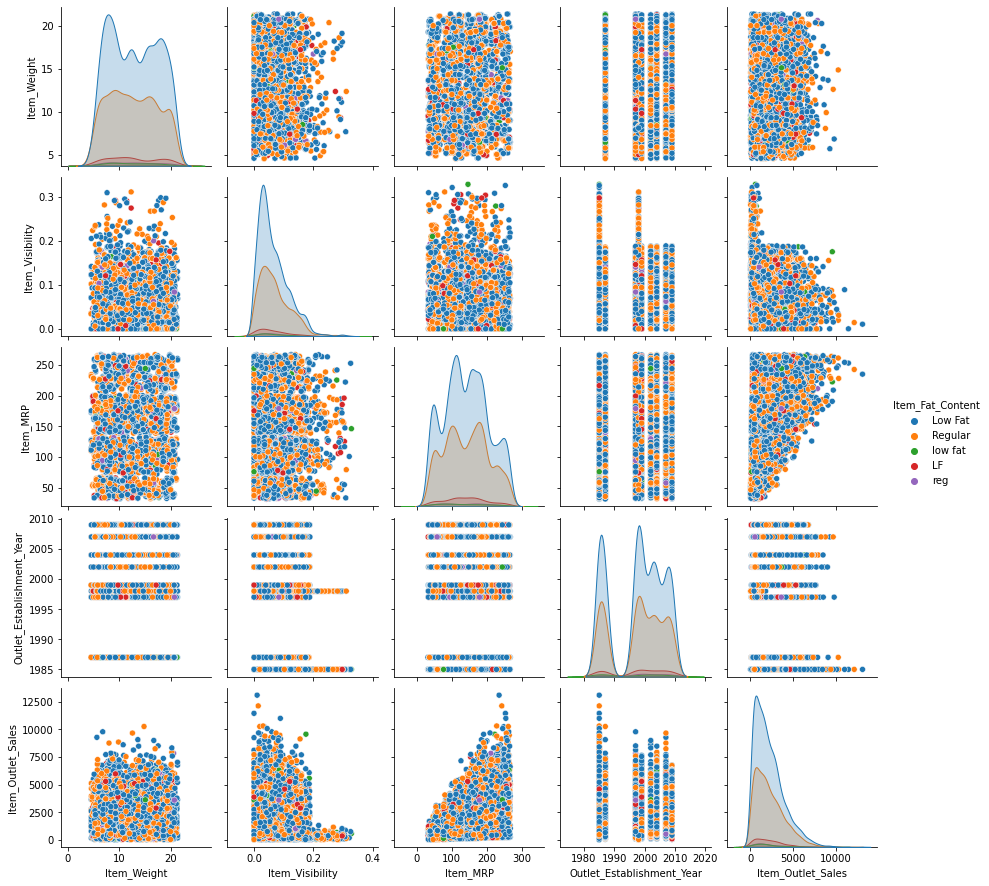

In [5]:
sns.pairplot(df, hue='Item_Fat_Content')

In [6]:
def changeitem(itemfat):
    if itemfat=='low fat' or itemfat== 'Low Fat' or itemfat=='LF':
        return 'LF'
    elif itemfat == 'Regular' or itemfat == 'reg':
        return 'R'
df['Fat_Content'] = df['Item_Fat_Content'].apply(lambda x: changeitem(x))
    

In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Fat_Content
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,LF
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,R
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,LF
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,R
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,LF


In [8]:
df['Fat_Content'].unique()

array(['LF', 'R'], dtype=object)

In [9]:
df.drop(['Item_Fat_Content'],axis=1,inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Fat_Content
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,LF
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,R
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,LF
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,R
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,LF


In [10]:
#dealing with Null Values
len(df['Item_Weight'].unique())

416

In [11]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
Fat_Content                     2
dtype: int64

In [12]:
df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


conclusions from the so far Non Null and numeric values are:
1. Item Weight, Item MRP have positive correlations to the sales
2. Item Visibility , Outlet est year have negative correlations


<AxesSubplot:xlabel='Fat_Content', ylabel='count'>

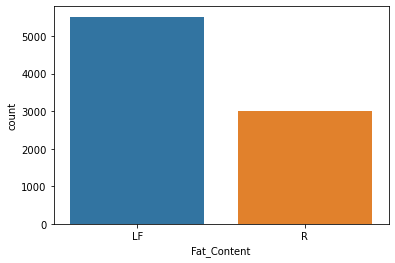

In [13]:
sns.countplot(x='Fat_Content',data=df)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Type'>

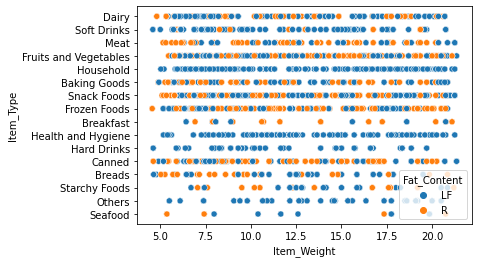

In [14]:
sns.scatterplot(x='Item_Weight',y='Item_Type',hue='Fat_Content',data=df)

there is no direct correlation between item weight and type as weights of all kinds exist for all kinds of items.

<AxesSubplot:xlabel='Fat_Content', ylabel='Item_Weight'>

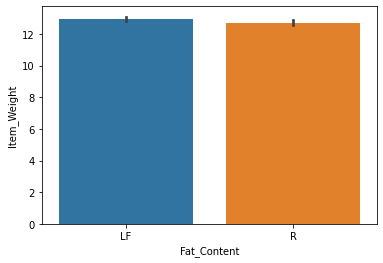

In [15]:
sns.barplot(x='Fat_Content',y='Item_Weight',data=df)

In [16]:
weight_mean= df['Item_Weight'].mean()

df['Item_Weight'].fillna(value=weight_mean,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
 11  Fat_Content                8523 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:
modeoutlet=df['Outlet_Size'].mode()

df['Outlet_Size'].fillna(value='Medium',inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
 11  Fat_Content                8523 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [20]:
df['Outlet_Size'].mode()

0    Medium
dtype: object

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

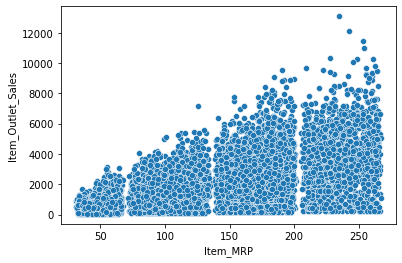

In [21]:
sns.scatterplot(y='Item_Outlet_Sales',x='Item_MRP',data=df)

In [22]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

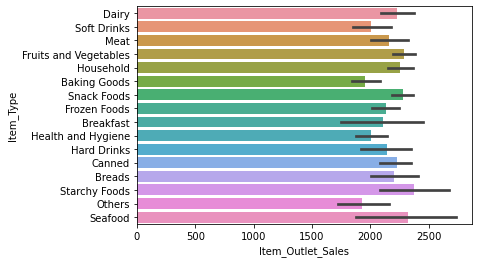

In [23]:
sns.barplot(x='Item_Outlet_Sales',y='Item_Type',data=df)

<AxesSubplot:xlabel='count', ylabel='Item_Type'>

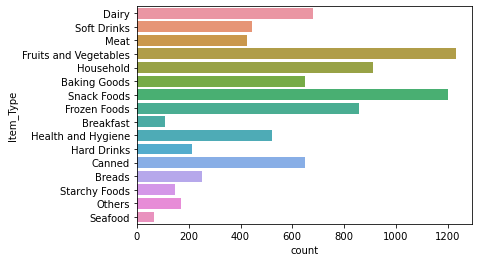

In [24]:
sns.countplot(y='Item_Type',data=df)

For all items the mean value lied between 1500 and 2500

In [25]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Type'>

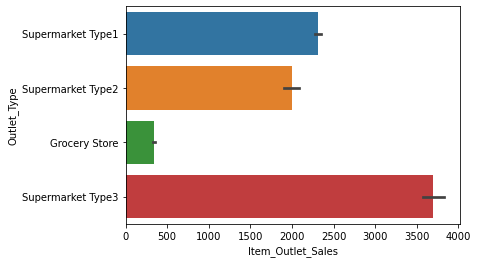

In [26]:
sns.barplot(x='Item_Outlet_Sales',y='Outlet_Type',data=df)

<AxesSubplot:xlabel='count', ylabel='Outlet_Type'>

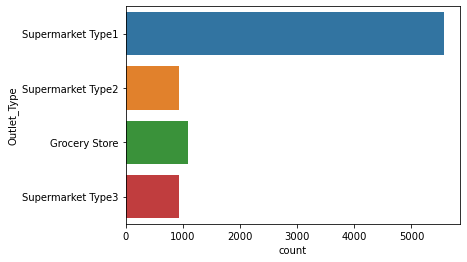

In [27]:
sns.countplot(y='Outlet_Type',data=df)

In [28]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Size'>

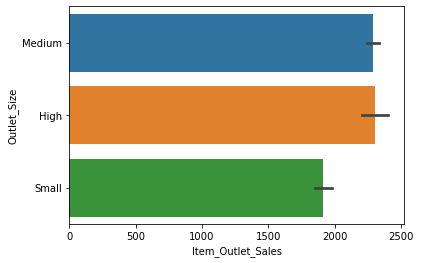

In [29]:
sns.barplot(x='Item_Outlet_Sales',y='Outlet_Size',data=df)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Fat_Content'>

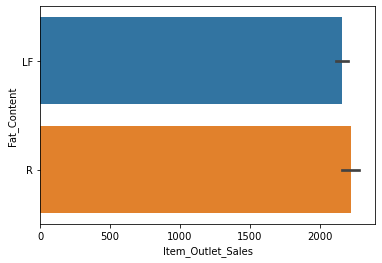

In [30]:
sns.barplot(x='Item_Outlet_Sales',y='Fat_Content',data=df)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Location_Type'>

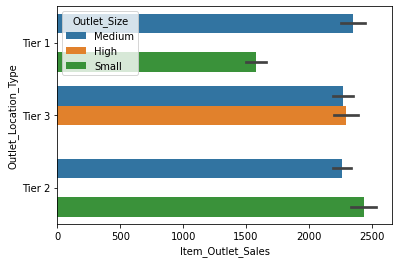

In [31]:
sns.barplot(x='Item_Outlet_Sales',y='Outlet_Location_Type',data=df,hue='Outlet_Size')

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

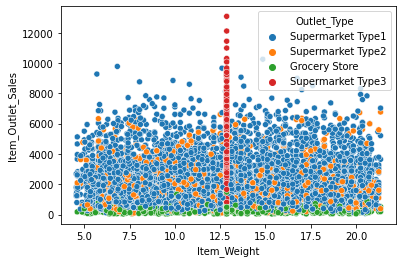

In [32]:
sns.scatterplot(y='Item_Outlet_Sales',x='Item_Weight',data=df,hue='Outlet_Type')

<AxesSubplot:>

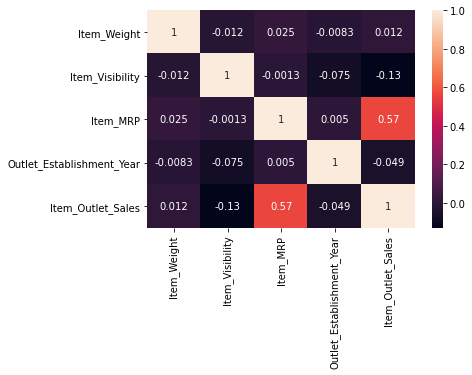

In [33]:
sns.heatmap(df.corr(),annot=True)

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Fat_Content
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,LF
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,R
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,LF
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,R
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,LF


In [35]:
#cat_f = df[['Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Fat_Content']]
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
transformed=MultiColumnLabelEncoder(columns = ['Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']).fit_transform(df.drop(['Outlet_Identifier','Item_Identifier'],axis=1))
transformed.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Fat_Content
0,9.30,0.016047,4,249.8092,1999,1,0,1,3735.1380,0
1,5.92,0.019278,14,48.2692,2009,1,2,2,443.4228,1
2,17.50,0.016760,10,141.6180,1999,1,0,1,2097.2700,0
3,19.20,0.000000,6,182.0950,1998,1,2,0,732.3800,1
4,8.93,0.000000,9,53.8614,1987,0,2,1,994.7052,0


In [36]:
y = transformed['Item_Outlet_Sales']
X = transformed.drop(['Item_Outlet_Sales'],axis=1)
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=41)


Using Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
predictions1 = model.predict(X_test)
predictions1

array([1370.20759312,  -33.25854509,  960.76482909, ..., 1693.917769  ,
        821.52617364, 2180.97360125])

Using Lasso Regression

In [50]:
from sklearn.linear_model import Lasso
model2 = Lasso()
model2.fit(X_train, y_train)
predictions2 = model.predict(X_test)
predictions2

array([1370.20759312,  -33.25854509,  960.76482909, ..., 1693.917769  ,
        821.52617364, 2180.97360125])

In [41]:
df1 = pd.read_csv('Test.csv')
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [42]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [43]:
def changeitem(itemfat):
    if itemfat=='low fat' or itemfat== 'Low Fat' or itemfat=='LF':
        return 'LF'
    elif itemfat == 'Regular' or itemfat == 'reg':
        return 'R'
df1['Fat_Content'] = df1['Item_Fat_Content'].apply(lambda x: changeitem(x))

In [44]:
weight_mean= df1['Item_Weight'].mean()

df1['Item_Weight'].fillna(value=weight_mean,inplace=True)

In [46]:
modeoutlet=df1['Outlet_Size'].mode()

df1['Outlet_Size'].fillna(value='Medium',inplace=True)

In [47]:
transformed1=MultiColumnLabelEncoder(columns = ['Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']).fit_transform(df1.drop(['Outlet_Identifier','Item_Identifier'],axis=1))
transformed1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Fat_Content
0,20.750000,Low Fat,0.007565,13,107.8622,1999,1,0,1,0
1,8.300000,reg,0.038428,4,87.3198,2007,1,1,1,1
2,14.600000,Low Fat,0.099575,11,241.7538,1998,1,2,0,0
3,7.315000,Low Fat,0.015388,13,155.0340,2007,1,1,1,0
4,12.695633,Regular,0.118599,4,234.2300,1985,1,2,3,1


In [52]:
model1.predict(transformed1.drop('Item_Fat_Content',axis=1)) #predictions of test using linear regression

array([2044.85507209, 1339.189446  , 2210.92983962, ..., 1723.57167215,
       3392.83199222, 1114.2369616 ])

In [53]:
model2.predict(transformed1.drop('Item_Fat_Content',axis=1)) #predictions using lasso regression

array([2022.72103202, 1323.60857732, 2226.21685806, ..., 1727.96261242,
       3363.28554784, 1123.37286786])